This notebook demonstrates the Bayes factor technique to test for the presence of forces that cannot be explained on the sole basis of diffusivity gradients.

A Bayes factor is the ratio of two posterior probabilities:

$$B = \frac{P(H_1|T)}{P(H_0|T)}$$

which enables the comparison between two models $H_0$ and $H_1$, considering data $T$.

The null hypothesis $H_0$ corresponds here to the situtation where the forces present are due to heterogeneous diffusivity.

See also https://tramway.readthedocs.io/en/latest/inference.html#force-testing
and https://arxiv.org/abs/1903.03048.

The *bayes_factor* module requires signal-to-noise extension features that can be appended to any diffusivity-based model (*DF*, *DV*, etc) with the *snr* module.
Beware however that *bayes_factor* uses only the diffusivity estimates for now, not the model-native force estimates.

In [1]:
## General definitions

# display settings
%matplotlib inline
import matplotlib.pyplot as plt
figsize = (12, 9)

# generation bounding box and sink centers
xmin, ymin, width, height = bounding_box = [0,0,2,2]
sink_centers = [[1.4,0.8], [0.85,1.1]]

# convenient plotting code from another notebook
import numpy as np
sink_centers = np.array(sink_centers)
xmax, ymax = xmin + width, ymin + height
def decorate():
    # plot a red square to materialize the generation box
    plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'r-', linewidth=1.5)
    # plot the sink centers
    plt.plot(sink_centers[:,0], sink_centers[:,1], 'r+')

# Static analysis

In [2]:
from tramway.helper import *

segmentation_label = 'hexagonal mesh'
model_label = 'diffusivity and force'
bayes_factor_label = 'Bayes factor'

# load the analysis tree
analyses = load_rwa('transient_sinks.rwa')
print(analyses)

<class 'pandas.core.frame.DataFrame'>
	'hexagonal mesh' <class 'tramway.tessellation.base.CellStats'>
		'density map' <class 'tramway.inference.base.Maps'>
		'diffusivity and force' <class 'tramway.inference.base.Maps'>
		'diffusivity and noisy force' <class 'tramway.inference.base.Maps'>


In [3]:
# add the SNR extensions required by the `bayes_factor` plugin
infer(analyses, 'snr', input_label=(segmentation_label, model_label), inplace=True)
print(analyses)

<class 'pandas.core.frame.DataFrame'>
	'hexagonal mesh' <class 'tramway.tessellation.base.CellStats'>
		'density map' <class 'tramway.inference.base.Maps'>
		'diffusivity and force' <class 'tramway.inference.base.Maps'>
		'diffusivity and noisy force' <class 'tramway.inference.base.Maps'>


In [4]:
# the `bayes_factor` module may generate a lot of logs; hide them all
import logging
logger = logging.getLogger()
logger.disabled = True

In [5]:
# Bayes factors
infer(analyses, 'bayes_factor', sigma=.01,
      input_label=(segmentation_label, model_label), output_label=bayes_factor_label)
print(analyses)

Skipping Bayes factor calculation for the current bin.
Call parameters: zeta_t=[ nan  nan], zeta_sp=[ nan  nan], n=[ 1.], V=[ nan], V_pi=[ 0.04963217], loc_error=0.0001
Skipping Bayes factor calculation for the current bin.
Call parameters: zeta_t=[ nan  nan], zeta_sp=[ nan  nan], n=[ 1.], V=[ nan], V_pi=[ 0.04963188], loc_error=0.0001
Skipping Bayes factor calculation for the current bin.
Call parameters: zeta_t=None, zeta_sp=None, n=None, V=None, V_pi=None, loc_error=0.0001
Skipping Bayes factor calculation for the current bin.
Call parameters: zeta_t=[ nan  nan], zeta_sp=[ nan  nan], n=[ 1.], V=[ nan], V_pi=[ 0.04963169], loc_error=0.0001
Skipping Bayes factor calculation for the current bin.
Call parameters: zeta_t=None, zeta_sp=None, n=None, V=None, V_pi=None, loc_error=0.0001
Skipping Bayes factor calculation for the current bin.
Call parameters: zeta_t=None, zeta_sp=None, n=None, V=None, V_pi=None, loc_error=0.0001
Skipping Bayes factor calculation for the current bin.
Call para

<class 'pandas.core.frame.DataFrame'>
	'hexagonal mesh' <class 'tramway.tessellation.base.CellStats'>
		'density map' <class 'tramway.inference.base.Maps'>
		'diffusivity and force' <class 'tramway.inference.base.Maps'>
			'Bayes factor' <class 'tramway.inference.base.Maps'>
		'diffusivity and noisy force' <class 'tramway.inference.base.Maps'>


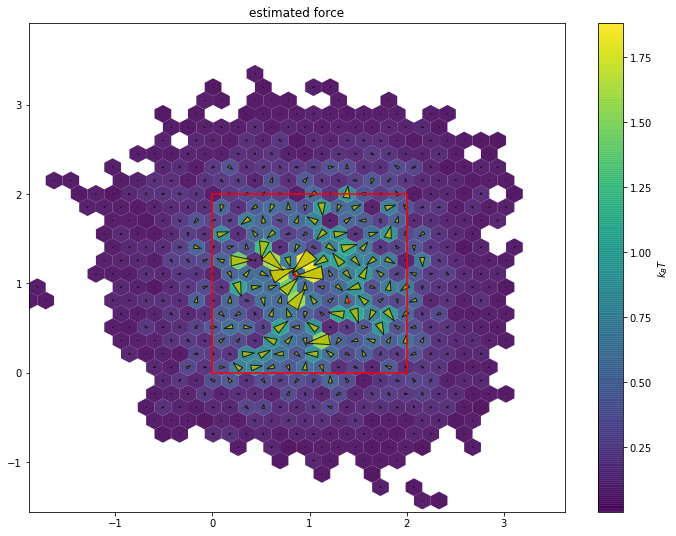

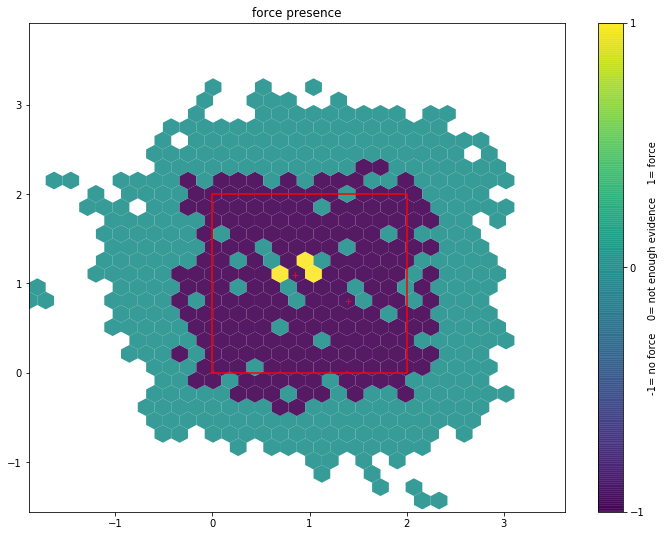

In [6]:
# plot the force detection map
map_plot(analyses, label=(segmentation_label, model_label),
         title='estimated force', feature='force', unit='$k_{B} T$',
         cell_arrow_ratio=.6,
         figsize=figsize, show=False)
decorate()

map_plot(analyses, label=(segmentation_label, model_label, bayes_factor_label),
         title='force presence', feature='force',
         colorbar=dict(ticks=[-1,0,1]), clabel='-1= no force    0= not enough evidence    1= force',
         figsize=figsize, show=False)
decorate()
plt.show()

'not enough evidence' means that $\frac{1}{B_{threshold}} < B < B_{threshold}$ with default $B_{threshold}=10$, i.e. a model ($H_0$ or $H_1$) is favoured if it is 10 times more likely than the other model.

# Dynamic analysis

In [7]:
from tramway.helper import *

segmentation_label = 'hexagonal mesh + sliding window'
model_label = 'DF mu=100'
bayes_factor_label = 'Bayes factor'

# load the analysis tree
analyses = load_rwa('cropped_trajectories.rwa')
# add the SNR extensions required by the `bayes_factor` plugin
infer(analyses, 'snr', input_label=(segmentation_label, model_label), inplace=True)
# calculate the Bayes factor
infer(analyses, 'bayes_factor', sigma=.01,
      input_label=(segmentation_label, model_label), output_label=bayes_factor_label)


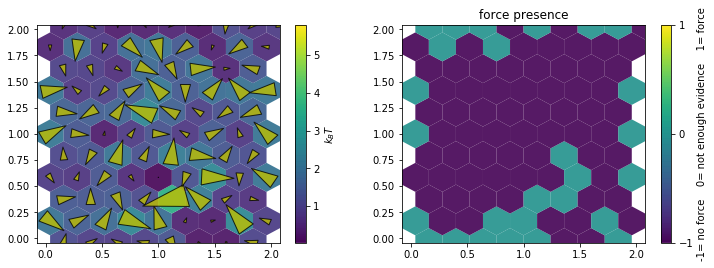

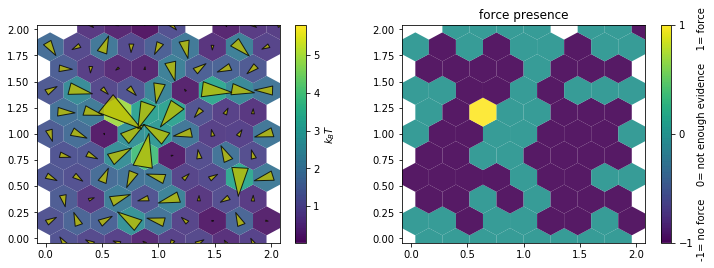

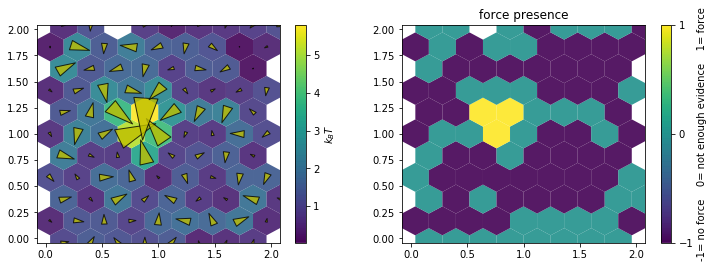

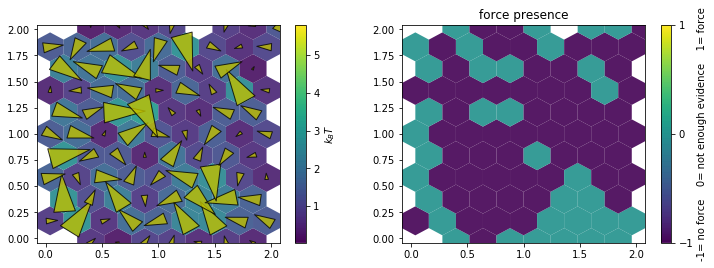

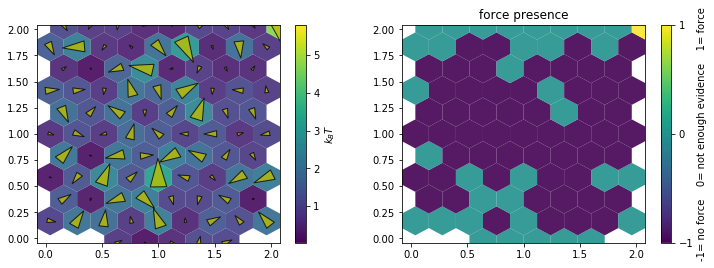

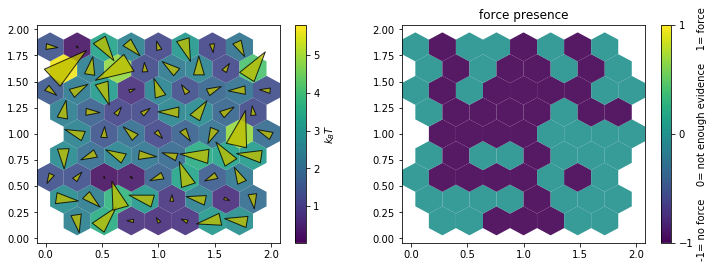

In [8]:
nsegments = 6
for segment in range(nsegments):
    
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(12, 4)
    
    map_plot(analyses, label=(segmentation_label, model_label), segment=segment,
         title='estimated force', feature='force', unit='$k_{B} T$',
         cell_arrow_ratio=.6,
         figure=fig, axes=axes[0], show=False)

    map_plot(analyses, label=(segmentation_label, model_label, bayes_factor_label), segment=segment,
         title='force presence', feature='force',
         colorbar=dict(ticks=[-1,0,1]), clabel='-1= no force    0= not enough evidence    1= force',
         figure=fig, axes=axes[1], show=False)

plt.show()